# Actividad 4: Análisis Exploratorio de Datos en Python

Importamos las librerías, lo único nuevo será seaborn.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Mismas características que en la actividad anterior.

In [14]:
url="https://raw.githubusercontent.com/Carlos8abl/F-sica-Computacional-1/main/Actividad%201/Climatolog%C3%ADaDiaria26160.txt"

columnas=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"]

df_dist = pd.read_csv(url, names=columnas, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

Copia del trabajo.

In [15]:
df_cop0=df_dist.copy()

Cambiamos los valores nulos por "No Medido".

In [16]:
str_Nulo= "Nulo"
df_cop1 = df_cop0.replace(to_replace=str_Nulo, value='No Medido', regex=True)

Convertimos a valores númericos las variables.

In [17]:
cols_list=["PRECIP", "EVAP", "TMAX", "TMIN"]
for cols in cols_list:
  df_cop1[cols]=pd.to_numeric(df_cop1[cols], errors='coerce')

In [18]:
df_cop2=df_cop1.copy()

Añadimos dos columnas nuevas con el año y el mes.

In [19]:
df_cop2["FECHA"]=pd.to_datetime(df_cop2["FECHA"], dayfirst=True).copy()

df_cop2['Año'] = df_cop2['FECHA'].dt.year
df_cop2['Mes'] = df_cop2['FECHA'].dt.month

In [20]:
df_climat=df_cop2.copy()

Cambiamos las columnas con números por caracteres.

In [22]:
df_climat.drop("Mes", axis=1, inplace=True)
df_climat["Mes"] = df_climat["FECHA"].dt.strftime("%b")

Información del trabajo y sus tipos de variables.

In [23]:
df_climat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14263 entries, 0 to 14262
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FECHA   14263 non-null  datetime64[ns]
 1   PRECIP  14184 non-null  float64       
 2   EVAP    2899 non-null   float64       
 3   TMAX    14094 non-null  float64       
 4   TMIN    14096 non-null  float64       
 5   Año     14263 non-null  int64         
 6   Mes     14263 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 780.1+ KB


Primeras 10 filas del archivo.

In [25]:
print(df_climat.head(10))

       FECHA  PRECIP  EVAP  TMAX  TMIN   Año  Mes
0 1969-01-02     0.0   NaN   NaN   0.0  1969  Jan
1 1969-01-03     0.0   NaN  24.0   2.0  1969  Jan
2 1969-01-04     0.0   NaN  25.0   3.0  1969  Jan
3 1969-01-06     0.0   NaN  22.0   4.0  1969  Jan
4 1969-01-07     0.0   NaN  21.0   3.0  1969  Jan
5 1969-01-08     0.0   NaN  30.0   4.0  1969  Jan
6 1969-01-09     0.0   NaN  28.0   5.0  1969  Jan
7 1969-01-10     0.0   NaN  28.0   5.0  1969  Jan
8 1969-01-11     0.0   NaN  25.0   3.0  1969  Jan
9 1969-01-13     0.0   NaN  27.0   4.0  1969  Jan


Histogramas de la precipitación, temperatura máxima y de la temperatura mínima (también habría de la evaporación pero en la estación que elegí no había datos medidos de esta y tampoco en las estaciones alrededor de esta).

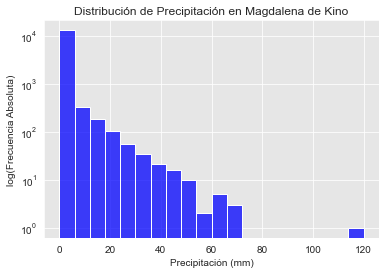

In [80]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frecuencia Absoluta)')
plt.title('Distribución de Precipitación en Magdalena de Kino')
sns.histplot(data=df_climat, x='PRECIP', bins=20, log_scale=(False,True),color="blue");
plt.grid(5)
plt.show(5)

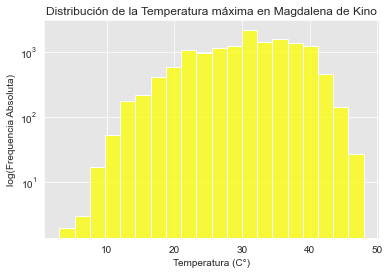

In [79]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.xlabel('Temperatura (C°)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de la Temperatura máxima en Magdalena de Kino')
sns.histplot(data=df_climat, x='TMAX', bins=20, log_scale=(False,True),color="yellow");
plt.grid(5)
plt.show(5)

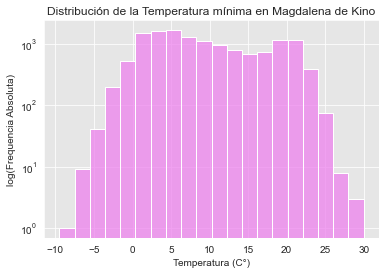

In [78]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.xlabel('Temperatura (C°)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de la Temperatura mínima en Magdalena de Kino')
sns.histplot(data=df_climat, x='TMIN', bins=20, log_scale=(False,True),color="violet");
plt.grid(5)
plt.show(5)

Agregamos dos variables nuevas para la precipitación media y promedio, lo mismo para la temperatura máxima y la temperatura mínima.

In [59]:
PRECIPmed=df_climat.PRECIP.median() 
PRECIPprom=df_climat.PRECIP.mean()

Gráficas de la densidad de probabilidad.

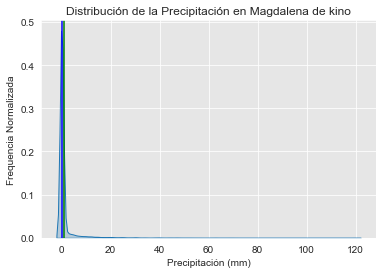

In [86]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.kdeplot(df_climat.PRECIP, fill=True);
plt.axvline(PRECIPmed, color='b'); 
plt.axvline(PRECIPprom, color='g');
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en Magdalena de kino')
plt.show(5)

In [62]:
TMAXmed=df_climat.TMAX.median()
TMAXprom=df_climat.TMAX.mean()

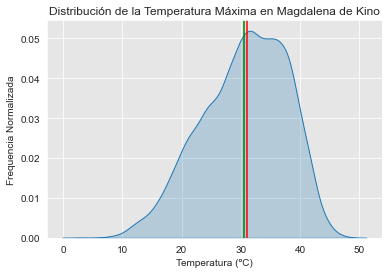

In [87]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.kdeplot(df_climat.TMAX, fill=True);
plt.axvline(TMAXmed, color='r'); 
plt.axvline(TMAXprom, color='g');
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Magdalena de Kino')
plt.show(5)

In [64]:
TMINmed=df_climat.TMIN.median() 
TMINprom=df_climat.TMIN.mean()

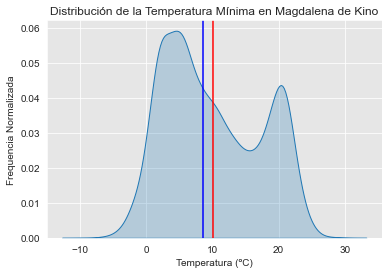

In [88]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.kdeplot(df_climat.TMIN, fill=True);
plt.axvline(TMINmed, color = 'b'); 
plt.axvline(TMINprom, color = 'r');
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Magdalena de Kino')
plt.show(5)

Gráficas de caja para la precipitación, temperatura máxima y temperatura mínima.

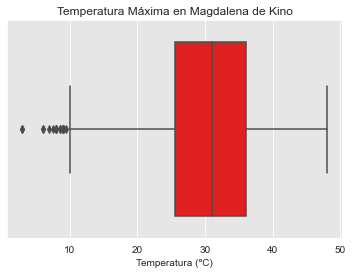

In [74]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.boxplot(x=df_climat.TMAX, data=df_climat, orient='h',color="red").set(xlabel='Temperatura (ºC)',
 title='Temperatura Máxima en Magdalena de Kino'); plt.show()

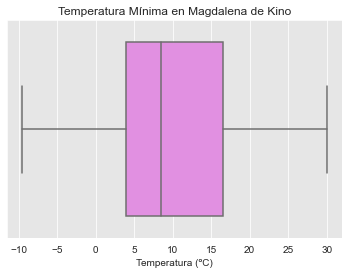

In [73]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.boxplot(x=df_climat.TMIN, data=df_climat, orient='h',color="violet").set(xlabel='Temperatura (ºC)', 
 title='Temperatura Mínima en Magdalena de Kino'); plt.show()

Rango de los últimos 30 años medidos por la estación.

In [72]:
df_T = df_climat[(df_climat['Año'] >= 1969) & (df_climat['Año'] < 2016)]

Gráfica de barras agrupadas por año para la precipitación.

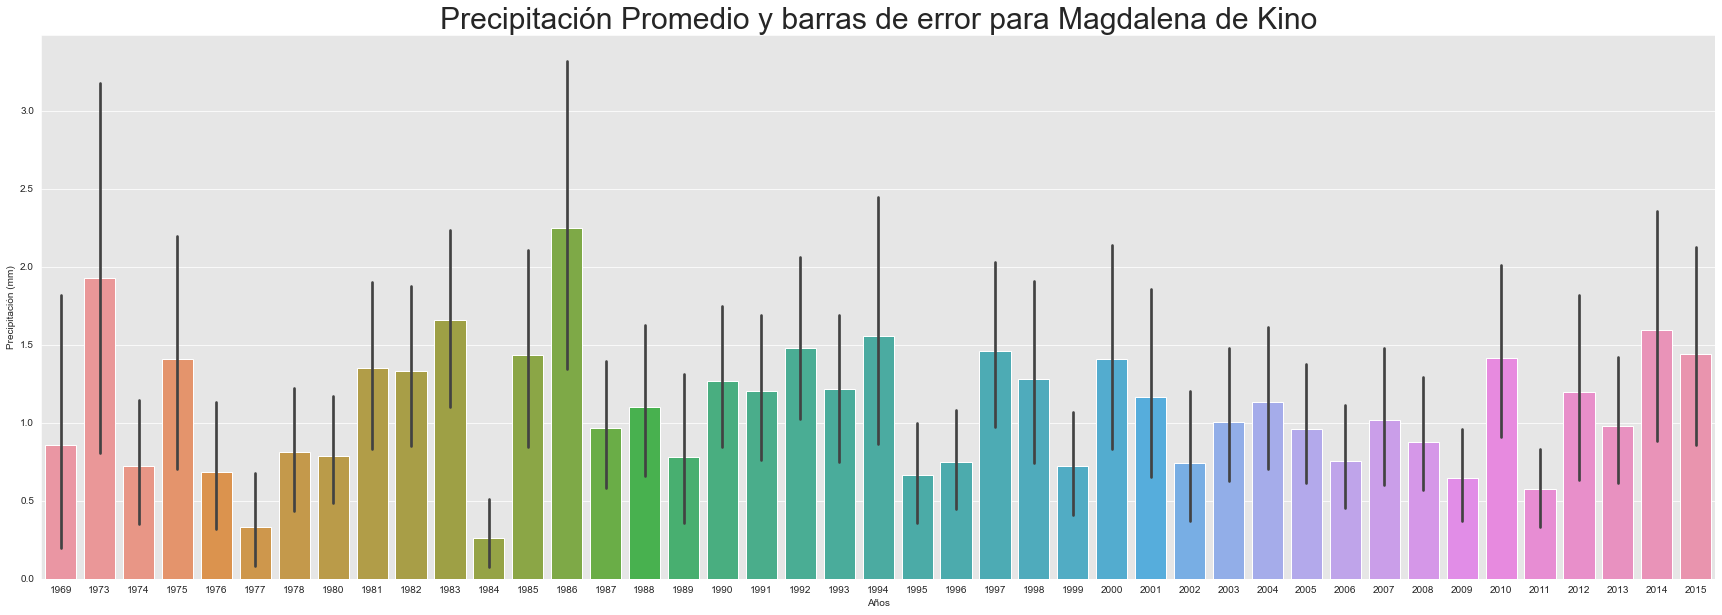

In [85]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(30,10))
g=sns.barplot(x='Año', y='PRECIP', data=df_T);
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Magdalena de Kino', fontsize=30)
plt.show(5)

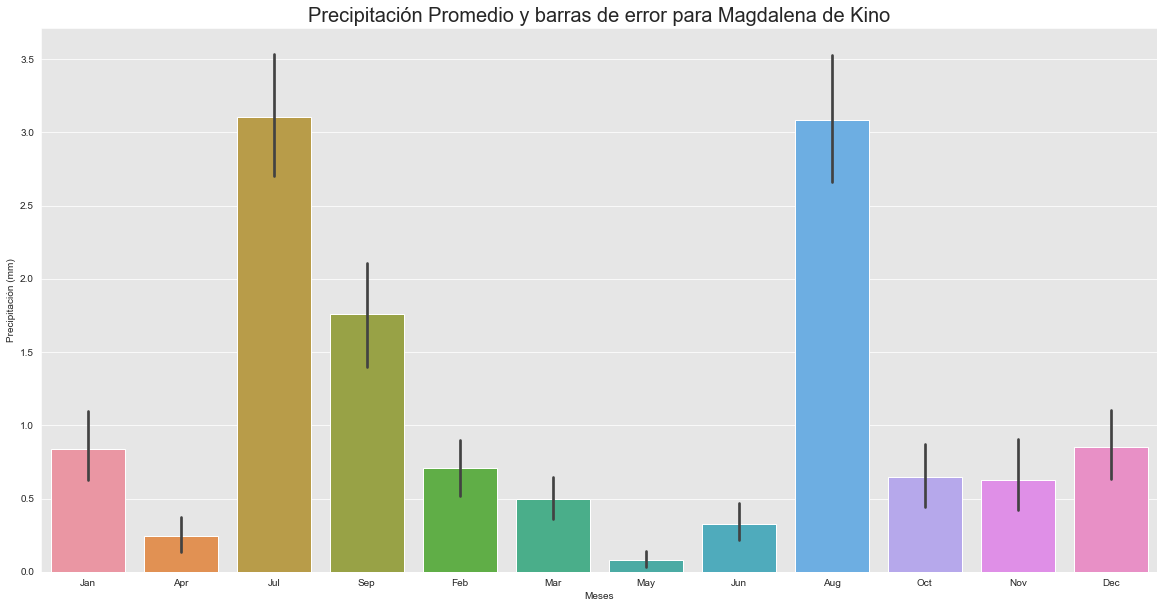

In [93]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(20,10))
g=sns.barplot(x='Mes', y='PRECIP', data=df_T);
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Magdalena de Kino', fontsize=20)
plt.show(5)

In [91]:
df_T30=df_climat[(df_climat['Año'] >= 1986) & (df_climat['Año'] < 2016)]

Gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo en los últimos 30 años.

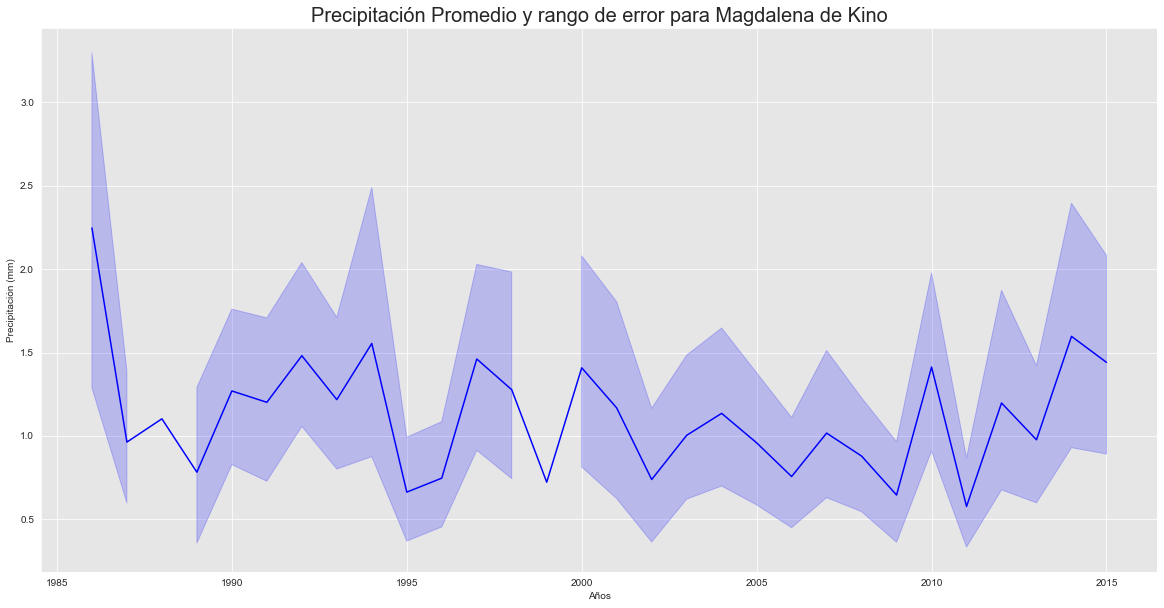

In [109]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(20,10))
g=sns.lineplot(x='Año', y='PRECIP', data=df_T30, color='b');
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Magdalena de Kino', fontsize=20)
plt.show(5)

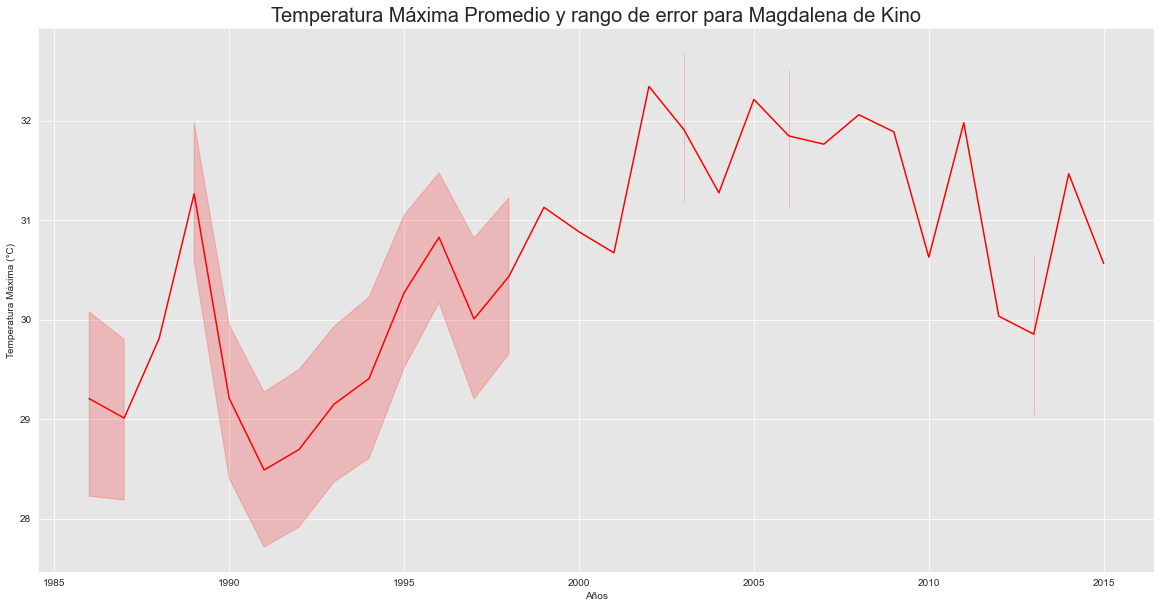

In [110]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(20,10))
g=sns.lineplot(x='Año', y='TMAX', data=df_T30, color='r');
plt.xlabel('Años')
plt.ylabel('Temperatura Máxima (°C)')
plt.title('Temperatura Máxima Promedio y rango de error para Magdalena de Kino', fontsize=20)
plt.show(5)

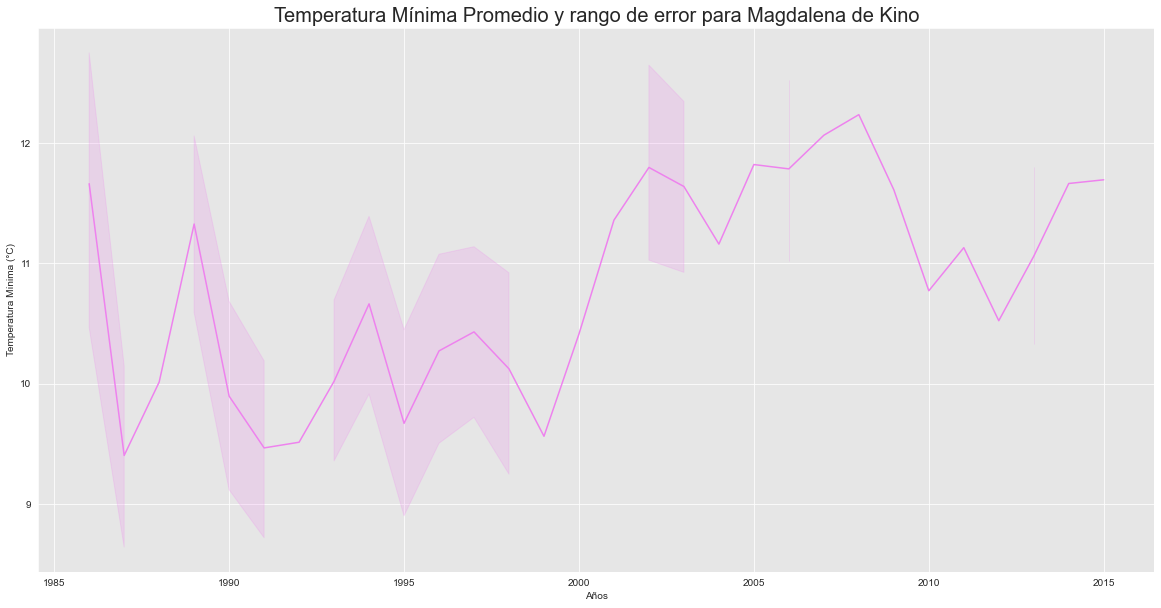

In [111]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(20,10))
g=sns.lineplot(x='Año', y='TMIN', data=df_T30, color='violet');
plt.xlabel('Años')
plt.ylabel('Temperatura Mínima (°C)')
plt.title('Temperatura Mínima Promedio y rango de error para Magdalena de Kino', fontsize=20)
plt.show(5)

In [99]:
TMAX_dc=df_climat.TMAX.mean()
TMIN_dc=df_climat.TMIN.mean()

Diagramas de cajas para la temperatura máxima y la temperatura mínima en los últimos 30 años.

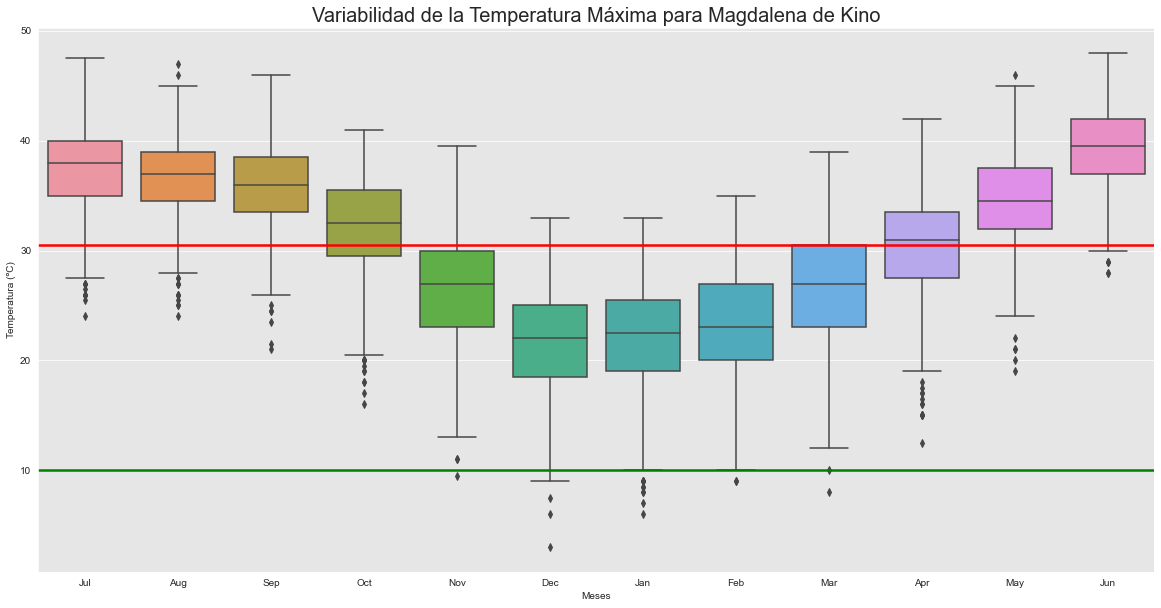

In [105]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(20,10))
g=sns.boxplot(x='Mes', y='TMAX', data=df_T30);
plt.axhline(TMAX_dc, color = 'r', linestyle='-', linewidth=2.5);
plt.axhline(TMIN_dc, color = 'g', linestyle='-', linewidth=2.5);
plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Magdalena de Kino', fontsize=20)
plt.show(5)

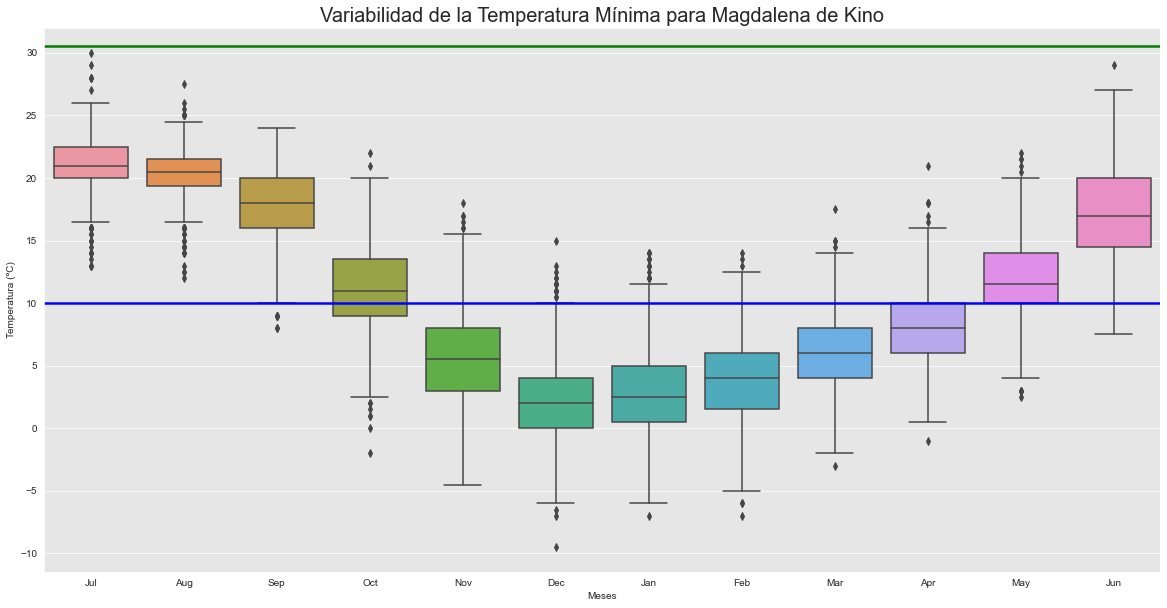

In [104]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(20,10))
g=sns.boxplot(x='Mes', y='TMIN', data=df_T30);
plt.axhline(TMAX_dc, color = 'g', linestyle='-', linewidth=2.5);
plt.axhline(TMIN_dc, color = 'b', linestyle='-', linewidth=2.5);
plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Magdalena de Kino', fontsize=20)
plt.show(5)